In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import rtbm.layers as layers
import rtbm.model as mdl

import warnings
warnings.filterwarnings('ignore')

from rtbm.costfunctions import mse, crossentropy
from rtbm import minimizer

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from scipy import signal

RTBM_precision= 1e-5

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


# Example 1: Sine-Mixture with gaussian noise

In [2]:
def func(x,n):
    return 0.5*np.sin(1*x+0.1)+0.75*np.sin(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

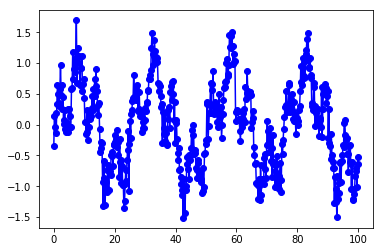

In [3]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [4]:
M = mdl.Model()
M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [5]:
minim = minimizer.CMA(parallel=False)
minim.train(mse(), M, X, Y, tolfun=1e-4)

CMA on 1 cpu(s) enabled
(7_w,14)-aCMA-ES (mu_w=4.3,w_1=36%) in dimension 29 (seed=830636, Fri Nov  3 21:02:03 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     14 2.507608862658531e-01 1.0e+00 9.46e-01  9e-01  1e+00 0:01.4
    2     28 2.539151618314910e-01 1.1e+00 9.16e-01  9e-01  9e-01 0:02.8
    3     42 2.139898051235367e-01 1.1e+00 9.03e-01  9e-01  9e-01 0:04.2
    6     84 2.194672044923542e-01 1.2e+00 8.85e-01  9e-01  9e-01 0:07.8
   10    140 2.133980499701615e-01 1.3e+00 9.14e-01  9e-01  1e+00 0:12.5
   15    210 2.189966631254536e-01 1.4e+00 9.78e-01  9e-01  1e+00 0:18.3
   21    294 2.212746054570940e-01 1.6e+00 9.91e-01  9e-01  1e+00 0:25.3
   28    392 2.206535735982643e-01 1.6e+00 1.03e+00  1e+00  1e+00 0:33.4
   35    490 2.186659090921676e-01 1.7e+00 7.99e-01  7e-01  9e-01 0:41.5
   43    602 2.109196763441035e-01 1.7e+00 7.16e-01  6e-01  8e-01 0:50.8
   52    728 2.146939234971250e-01 1.8e+00 6.81e-01  6e-01  7e-01 1:01.3
   62    

 3662  51268 3.158452676441386e-02 3.1e+03 1.26e-02  1e-04  2e-02 74:20.1
 3700  51800 3.153084482025029e-02 3.3e+03 1.22e-02  1e-04  2e-02 75:14.4
 3739  52346 3.148932226868883e-02 3.4e+03 8.30e-03  9e-05  1e-02 76:08.6
CMAEvolutionStrategyResult(xbest=array([ 0.09473653,  0.27290413, -7.49234169,  0.30827937,  0.89035405,
        0.19968377,  1.5211936 ,  7.45840551,  9.99871109,  0.2961272 ,
       -4.24609853, -5.05556399,  0.36835992,  4.55920672,  4.78800598,
        3.78202267, -6.12896622, -9.51698993, -9.76231978,  2.02141018,
        9.85641494,  5.53384215,  5.85632024,  1.15044577,  0.34328877,
        2.41834137, -4.1353258 ,  0.72540302,  0.31607532]), fbest=(0.031487154438761211+0j), evals_best=52309, evaluations=52346, iterations=3739, xfavorite=array([  0.09754766,   0.26881854,  -7.48216447,   0.30866076,
         0.89041459,   0.19950393,  19.57727717,   7.45823887,
        10.60456202,   0.28919821,  -4.23716166,  -5.03701237,
         0.36622909,   4.5631142 ,   4

array([ 0.09473653,  0.27290413, -7.49234169,  0.30827937,  0.89035405,
        0.19968377,  1.5211936 ,  7.45840551,  9.99871109,  0.2961272 ,
       -4.24609853, -5.05556399,  0.36835992,  4.55920672,  4.78800598,
        3.78202267, -6.12896622, -9.51698993, -9.76231978,  2.02141018,
        9.85641494,  5.53384215,  5.85632024,  1.15044577,  0.34328877,
        2.41834137, -4.1353258 ,  0.72540302,  0.31607532])

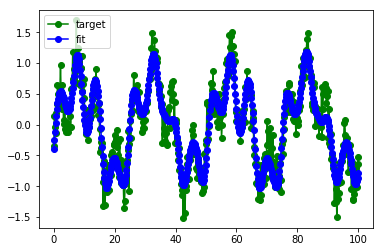

In [12]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"bo-", label='fit')
plt.legend()

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

minim = minimizer.SGD()
minim.train(mse(), M, X, Y, lr=0.1, momentum=0,nesterov=False,noise=0.1, maxiter=1000)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.legend()

# Example 2: Sine-Cosine-Mixture with trend and gaussian noise

In [ ]:
def func(x,n):
    return 0.02*x+0.5*np.sin(1*x+0.1)+0.75*np.cos(0.25*x-0.3)+n*np.random.normal(0,0.2,x.shape[2])

X = np.linspace(0, 100, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
Y = func(X[:,None],0).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix.eps", format="eps")
plt.show()


In [ ]:
Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"-")
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_noise.eps", format="eps")

plt.show()



In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,3))
M.add(layers.DiagExpectationUnitLayer(3,3))
M.add(layers.DiagExpectationUnitLayer(3,2))
M.add(layers.DiagExpectationUnitLayer(2,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse(), M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 100, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.savefig("sincosmix_10-4.eps", format="eps")
plt.show()

# Example: Intrawave modulation

In [ ]:
def func(x,n):
    return np.cos(0.01*x+0.5*np.cos(0.05*x))/(2+np.sin(0.04*x))

X = np.linspace(0, 1000, 1000)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

plt.plot(X.flatten(), Y.flatten(),"b-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,5))
M.add(layers.DiagExpectationUnitLayer(5,5))
M.add(layers.DiagExpectationUnitLayer(5,3))
M.add(layers.DiagExpectationUnitLayer(3,1))

In [ ]:
minim = minimizer.CMA(parallel=True)
minim.train(mse(), M, X, Y, tolfun=1e-4)

In [ ]:
npoints = 1000
test_X = (np.linspace(0, 1000, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og", label='train')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"b-", label='fit', linewidth=5)
plt.legend()
plt.xlabel("t")
plt.ylabel("y")

# Example 3: Saw-tooth

In [ ]:
def func(x,n):
    return signal.sawtooth(x)

X = np.linspace(0, 30, 500)
X = X.reshape((1,X.shape[0]))

Y = func(X[:,None],1).reshape((1,X.shape[1]))

In [ ]:
plt.plot(X.flatten(), Y.flatten(),"ob-")

In [ ]:
M = mdl.Model()

M.add(layers.DiagExpectationUnitLayer(1,100))
minim = minimizer.CMA(parallel=True)
minim.train(mse(), M, X, Y, maxiter=100)

In [ ]:
npoints = 500
test_X = (np.linspace(0, 30, npoints)).reshape((1, npoints))

plt.plot(X.flatten(), Y.flatten(),"og-", label='target')
plt.plot(test_X.flatten(), np.real(M.predict(test_X)).flatten(),"ob-", label='fit')
plt.xaxis("t")
plt.yaxis("y(t)")
plt.savefig("sawtooth_reg.eps", format="eps")
plt.legend()

# Example 3: MNIST (work in progress...)

In [ ]:
# Load MNIST dataset
MNIST_train = pd.read_csv('~/data/mnist_train.csv', delimiter=",",header=None).values
MNIST_test  = pd.read_csv('~/data/mnist_test.csv', delimiter=",",header=None).values

# Prepare data (normalized onto [0,1])
Y_train = MNIST_train[0:10000,0]
X_train = MNIST_train[0:10000,1:]/255.0

Y_test = MNIST_test[:,0]
X_test = MNIST_test[:,1:]/255.0

In [ ]:
M = mdl.Model()
#M.add(layers.Linear(784,1,paramBound=100))
M.add(layers.DiagExpectationUnitLayer(784,1,Qmax=5,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(784,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(25,10,Qmax=3,paramBound=5))
#M.add(layers.DiagExpectationUnitLayer(10,1))
#M.add(layers.SoftMaxLayer(10))
#M.add(layers.MaxPosLayer(10,1))

#enc = LabelBinarizer()
#enc.fit(np.diag([1,1,1,1,1,1,1,1,1,1]))
#enc.classes_ = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#T=enc.transform(Y_train)


In [ ]:
minim = minimizer.CMA(True)

sol=minim.train(mse(), M, np.transpose(X_train), np.transpose(Y_train), maxiter=1000)

In [ ]:
#P=np.argmax(np.real(M.predict(np.transpose(X_train))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_train)))))


print(classification_report(Y_train,P.T))
print(confusion_matrix(Y_train, P.T))

In [ ]:
#P=np.argmax(np.real(M.predict(np.transpose(X_test))),axis=0)
P=np.abs(np.round(np.real(M.predict(np.transpose(X_test)))))


print(classification_report(Y_test,P.T))
print(confusion_matrix(Y_test, P.T))